# Importing Data

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
house_price_df = pd.read_csv("C://Users//ganes//OneDrive//Desktop//house_prices.csv")
house_price_df

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


# Data Cleaning

In [499]:
import pandas as pd
import re

def clean_title(value):
    if pd.isnull(value):
        return "Unknown"

    value = str(value).strip().lower()

    # Case 1: Match "2 bhk", "3bhk", "1 bhk flat" etc.
    bhk_match = re.search(r'(\d+)\s*bhk', value)
    if bhk_match:
        return bhk_match.group(1) + "BHK"

    # Case 2: Only a number (e.g., "2", "3") → assume it's BHK
    number_only = re.fullmatch(r'\d+', value)
    if number_only:
        return value + "BHK"

    # Case 3: Otherwise, return first word capitalized
    return value.split()[0].capitalize()

# Apply the function
house_price_df['Title'] = house_price_df['Title'].apply(clean_title)

# Optional: See what unique values you have now
print(house_price_df['Title'].unique())


['1BHK' '2BHK' '3BHK' '4BHK' '5BHK' 'Studio' '6BHK' 'Apartment' '8BHK'
 '7BHK' '10BHK' '9BHK' 'Builder']


In [500]:
house_price_df["Title"].unique()

array(['1BHK', '2BHK', '3BHK', '4BHK', '5BHK', 'Studio', '6BHK',
       'Apartment', '8BHK', '7BHK', '10BHK', '9BHK', 'Builder'],
      dtype=object)

In [501]:
house_price_df.head(2)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1BHK,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2BHK,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN


In [502]:
house_price_df.drop(["Index","Description","Price (in rupees)","Society","Dimensions","Plot Area","Car Parking","Super Area"] , axis = 1 , inplace = True)
house_price_df.head(2)

,Title,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1BHK,42 Lac,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,1,2,NaN
1,2BHK,98 Lac,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,NaN,Freehold


In [503]:

def convert_price_to_number(x):
    x = str(x).lower().replace(",", "").strip()
    if "lac" in x or "lakh" in x:
        return float(x.split()[0]) * 1_00_000
    elif "cr" in x or "crore" in x:
        return float(x.split()[0]) * 1_00_00_000
    elif x.replace('.', '', 1).isdigit():
        return float(x)  
    else:
        return None 
house_price_df['Amount(in rupees)'] = house_price_df['Amount(in rupees)'].apply(convert_price_to_number)


In [504]:
def clean_area(area):
    if pd.isnull(area):
        return None
    area = str(area).lower().replace(",", "").strip()
    if "sqft" in area or "sq.ft" in area:
        return float(area.split()[0])
    elif area.replace('.', '', 1).isdigit():
        return float(area)
    else:
        return None

# Apply cleaning to Carpet Area
house_price_df['Carpet Area (in sqft)'] = house_price_df['Carpet Area'].apply(clean_area)


# Data Type Conversion

In [506]:
def extract_floor_info(floor_text):
    if pd.isnull(floor_text):
        return (None, None)

    floor_text = floor_text.lower().strip()

    if 'ground' in floor_text:
        parts = floor_text.split()
        total = int(parts[-1]) if parts[-1].isdigit() else None
        return (0, total)
    
    if 'basement' in floor_text:
        parts = floor_text.split()
        total = int(parts[-1]) if parts[-1].isdigit() else None
        return (-1, total)

    if 'out of' in floor_text:
        parts = floor_text.split('out of')
        try:
            current = int(''.join(filter(str.isdigit, parts[0])))
            total = int(''.join(filter(str.isdigit, parts[1]))) if len(parts) > 1 else None
            return (current, total)
        except:
            return (None, None)

    return (None, None)

# Apply and convert tuple to two columns
floor_info = house_price_df['Floor'].apply(extract_floor_info)
house_price_df['Current Floor'] = floor_info.apply(lambda x: x[0])
house_price_df['Total Floors'] = floor_info.apply(lambda x: x[1])

# Fill nulls with rounded mean (custom rounding logic)
current_mean = house_price_df['Current Floor'].mean()
total_mean = house_price_df['Total Floors'].mean()

current_fill = int(current_mean + 0.5) if current_mean % 1 >= 0.5 else int(current_mean)
total_fill = int(total_mean + 0.5) if total_mean % 1 >= 0.5 else int(total_mean)

house_price_df['Current Floor'] = house_price_df['Current Floor'].fillna(current_fill).astype(int)
house_price_df['Total Floors'] = house_price_df['Total Floors'].fillna(total_fill).astype(int)



In [508]:
house_price_df["Total Floors"].unique()

array([ 11,  22,  29,   3,  42,   7,   5,   2,  27,  20,  24,  16,  28,
        31,   8,  17,   4,  38,  19,   9,  12,  10,  30,  18,  26,  32,
        25,  14,   6,  15,  13,  35,  23,   1,  21,  36,  40,  45,  50,
        33,  34,  37,  39,  88,  55,  41,  51,  44,  60,  54,  58,  68,
        67,  56,  63,  91,  52,  47,  48,  85,  78,  43,  53,  77,  75,
        76,  61,  46,  72,  84, 150, 200,  70])

In [509]:
house_price_df.drop(["Carpet Area","Floor"] , axis = 1 , inplace = True)
house_price_df.head(2)

,Title,Amount(in rupees),location,Status,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,4200000.0,thane,Ready to Move,Resale,Unfurnished,NaN,NaN,1,2,NaN,500.0,10,11
1,2BHK,9800000.0,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,2,NaN,Freehold,473.0,3,22


In [511]:
import re
import pandas as pd

def extract_clean_number(val):
    if pd.isnull(val):
        return None
    val = str(val).strip().lower()
    if val in ["--", "nan", "none", ""]:
        return None
    match = re.search(r'\d+', val)
    if match:
        return int(match.group())
    return None

# Apply extractor
house_price_df['Bathroom'] = house_price_df['Bathroom'].apply(extract_clean_number)
house_price_df['Balcony'] = house_price_df['Balcony'].apply(extract_clean_number)

# Check value counts BEFORE filling (optional)
print("Bathrooms after cleaning:\n", house_price_df['Bathroom'].value_counts(dropna=False))
print("\nBalconies after cleaning:\n", house_price_df['Balcony'].value_counts(dropna=False))

# Replace missing values with rounded mean (your custom rounding)
bathroom_mean = house_price_df['Bathroom'].mean()
balcony_mean = house_price_df['Balcony'].mean()

bathroom_fill = int(bathroom_mean + 0.5) if bathroom_mean % 1 >= 0.5 else int(bathroom_mean)
balcony_fill = int(balcony_mean + 0.5) if balcony_mean % 1 >= 0.5 else int(balcony_mean)

# Fill and cast to int
house_price_df['Bathroom'] = house_price_df['Bathroom'].fillna(bathroom_fill).astype(int)
house_price_df['Balcony'] = house_price_df['Balcony'].fillna(balcony_fill).astype(int)


Bathrooms after cleaning:
 Bathroom
2.0     93007
3.0     55781
1.0     18654
4.0     15600
5.0      3343
NaN       828
6.0       209
10.0       49
7.0        35
8.0        14
9.0        11
Name: count, dtype: int64

Balconies after cleaning:
 Balcony
2.0     51809
1.0     49219
NaN     48935
3.0     27111
4.0      9420
5.0       841
6.0       132
10.0       35
7.0        14
8.0        13
9.0         2
Name: count, dtype: int64


In [515]:
house_price_df.head()

,Title,Amount(in rupees),location,Status,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,4200000.0,thane,Ready to Move,Resale,Unfurnished,NaN,NaN,1,2,NaN,500.0,10,11
1,2BHK,9800000.0,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold,473.0,3,22
2,2BHK,14000000.0,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,2,2,Freehold,779.0,10,29
3,1BHK,2500000.0,thane,Ready to Move,Resale,Unfurnished,NaN,NaN,1,1,NaN,530.0,1,3
4,2BHK,16000000.0,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society,635.0,20,42


# Handling Duplicates¶

In [518]:
duplicate_rows = house_price_df[house_price_df.duplicated()]
print(duplicate_rows.shape[0])

121275


In [520]:
house_price_df = house_price_df.drop_duplicates()

In [521]:
house_price_df

,Title,Amount(in rupees),location,Status,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,4200000.0,thane,Ready to Move,Resale,Unfurnished,NaN,NaN,1,2,NaN,500.0,10,11
1,2BHK,9800000.0,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold,473.0,3,22
2,2BHK,14000000.0,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,2,2,Freehold,779.0,10,29
3,1BHK,2500000.0,thane,Ready to Move,Resale,Unfurnished,NaN,NaN,1,1,NaN,530.0,1,3
4,2BHK,16000000.0,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society,635.0,20,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3BHK,6300000.0,zirakpur,Ready to Move,New Property,Semi-Furnished,East,Garden/Park,3,3,Freehold,NaN,2,4
187527,3BHK,5500000.0,zirakpur,Ready to Move,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,2,NaN,NaN,4,6
187528,3BHK,7600000.0,zirakpur,Ready to Move,Resale,Furnished,East,"Garden/Park, Main Road",3,2,Freehold,1250.0,1,3
187529,2BHK,3000000.0,zirakpur,Ready to Move,Resale,Semi-Furnished,NaN,Main Road,2,2,NaN,NaN,2,2


# Handling Missing Values

In [524]:
num_df = house_price_df.select_dtypes(include = "number")
cat_df = house_price_df.select_dtypes(exclude = "number")

In [527]:
num_df.isna().sum()

Amount(in rupees)         2776
Bathroom                     0
Balcony                      0
Carpet Area (in sqft)    30462
Current Floor                0
Total Floors                 0
dtype: int64

In [528]:
for col in num_df:
    mean_val = round(num_df[col].mean(), 1)
    print("For", col, "mean is", mean_val)
    num_df[col] = num_df[col].fillna(mean_val)

For Amount(in rupees) mean is 10715526.8
For Bathroom mean is 2.4
For Balcony mean is 2.1
For Carpet Area (in sqft) mean is 1294.4
For Current Floor mean is 4.3
For Total Floors mean is 8.6


In [529]:
num_df.isna().sum()

Amount(in rupees)        0
Bathroom                 0
Balcony                  0
Carpet Area (in sqft)    0
Current Floor            0
Total Floors             0
dtype: int64

In [530]:
cat_df.isna().sum()

Title              0
location           0
Status           293
Transaction       78
Furnishing      1233
facing         25837
overlooking    28524
Ownership      24006
dtype: int64

In [532]:
for col in cat_df:
    print("For", col, "mode is", cat_df[col].mode()[0])
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

For Title mode is 3BHK
For location mode is new-delhi
For Status mode is Ready to Move
For Transaction mode is Resale
For Furnishing mode is Semi-Furnished
For facing mode is East
For overlooking mode is Main Road
For Ownership mode is Freehold


In [534]:
cat_df.isna().sum()

Title          0
location       0
Status         0
Transaction    0
Furnishing     0
facing         0
overlooking    0
Ownership      0
dtype: int64

In [535]:
house_price_df = pd.concat([cat_df,num_df],axis = 1)

In [537]:
house_price_df.head()

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22
2,2BHK,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29
3,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,2500000.0,1,1,530.0,1,3
4,2BHK,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42


In [540]:
house_price_df["Status"].unique()

array(['Ready to Move'], dtype=object)

In [545]:
house_price_df["Balcony"].unique()

array([ 2,  1,  3,  4, 10,  6,  5,  7,  8,  9])

In [547]:
house_price_df["Carpet Area (in sqft)"].unique()

array([ 500.,  473.,  779., ..., 1526., 1634.,  136.])

In [550]:
house_price_df

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22
2,2BHK,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29
3,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,2500000.0,1,1,530.0,1,3
4,2BHK,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3BHK,zirakpur,Ready to Move,New Property,Semi-Furnished,East,Garden/Park,Freehold,6300000.0,3,3,1294.4,2,4
187527,3BHK,zirakpur,Ready to Move,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Freehold,5500000.0,3,2,1294.4,4,6
187528,3BHK,zirakpur,Ready to Move,Resale,Furnished,East,"Garden/Park, Main Road",Freehold,7600000.0,3,2,1250.0,1,3
187529,2BHK,zirakpur,Ready to Move,Resale,Semi-Furnished,East,Main Road,Freehold,3000000.0,2,2,1294.4,2,2


In [553]:
house_price_df.drop_duplicates(inplace=True)
house_price_df

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22
2,2BHK,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29
3,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,2500000.0,1,1,530.0,1,3
4,2BHK,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3BHK,zirakpur,Ready to Move,New Property,Semi-Furnished,East,Garden/Park,Freehold,6300000.0,3,3,1294.4,2,4
187527,3BHK,zirakpur,Ready to Move,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Freehold,5500000.0,3,2,1294.4,4,6
187528,3BHK,zirakpur,Ready to Move,Resale,Furnished,East,"Garden/Park, Main Road",Freehold,7600000.0,3,2,1250.0,1,3
187529,2BHK,zirakpur,Ready to Move,Resale,Semi-Furnished,East,Main Road,Freehold,3000000.0,2,2,1294.4,2,2


# Exploratory Data Analysis (EDA)

## Univariae Analysis

### Categorical

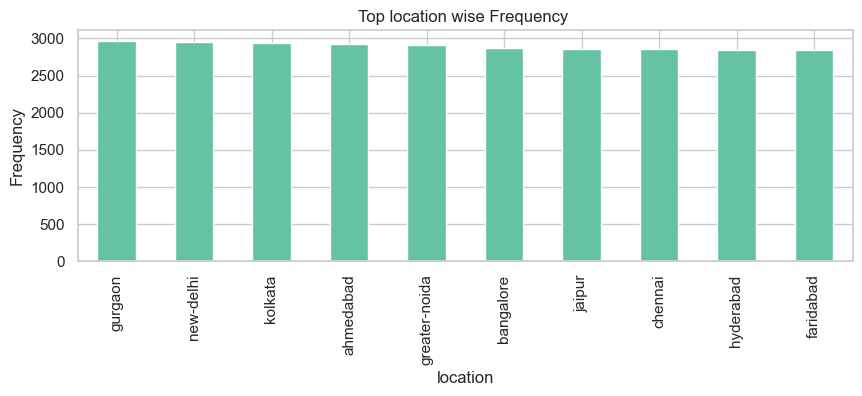

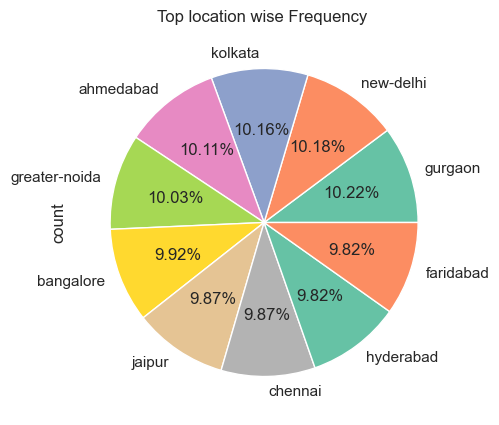

In [562]:
plt.figure(figsize = (10,3))
house_price_df["location"].value_counts()[:10].plot(kind = "bar")
plt.xlabel("location")
plt.ylabel("Frequency")
plt.title("Top location wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["location"].value_counts()[:10].plot.pie(autopct = "%.2f%%")
plt.title("Top location wise Frequency ")
plt.show()

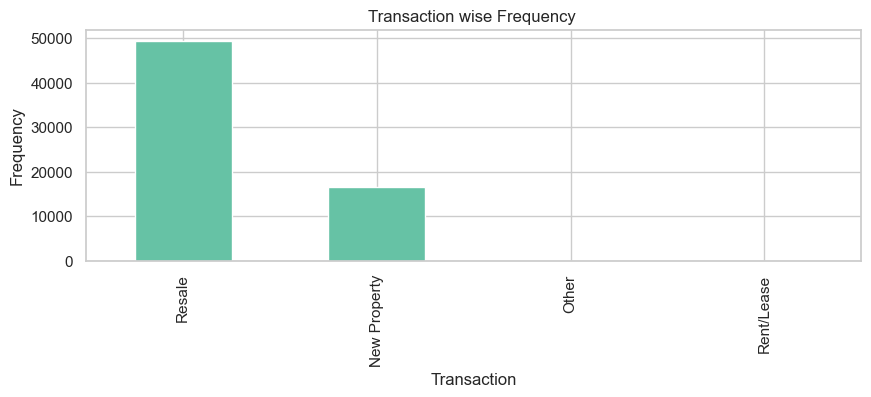

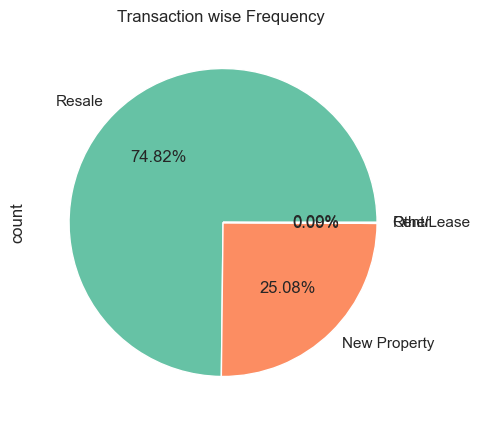

In [563]:
plt.figure(figsize = (10,3))
house_price_df["Transaction"].value_counts().plot(kind = "bar")
plt.xlabel("Transaction")
plt.ylabel("Frequency")
plt.title("Transaction wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["Transaction"].value_counts().plot.pie(autopct = "%.2f%%")
plt.title("Transaction wise Frequency ")
plt.show()

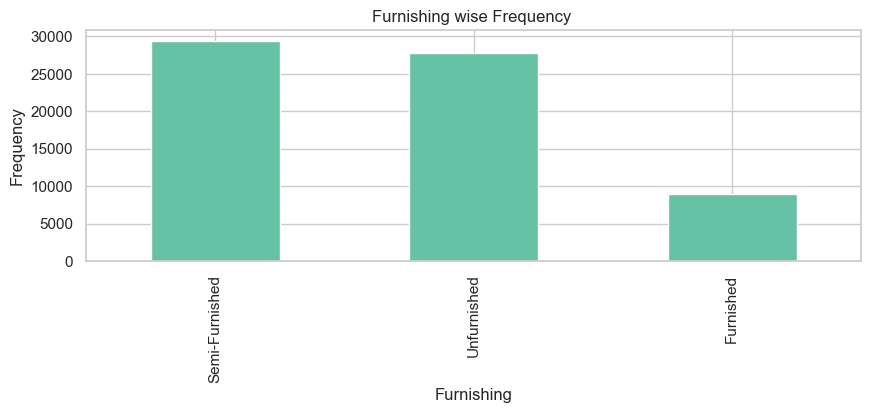

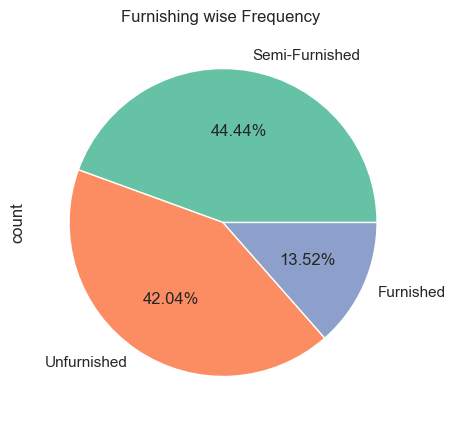

In [565]:
plt.figure(figsize = (10,3))
house_price_df["Furnishing"].value_counts().plot(kind = "bar")
plt.xlabel("Furnishing")
plt.ylabel("Frequency")
plt.title("Furnishing wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["Furnishing"].value_counts().plot.pie(autopct = "%.2f%%")
plt.title("Furnishing wise Frequency ")
plt.show()

In [566]:
house_price_df["facing"].unique()

array(['East', 'West', 'North - East', 'North', 'North - West', 'South',
       'South -West', 'South - East'], dtype=object)

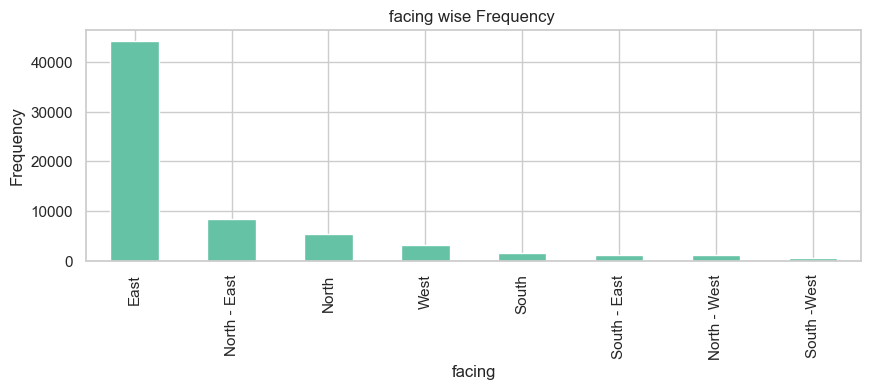

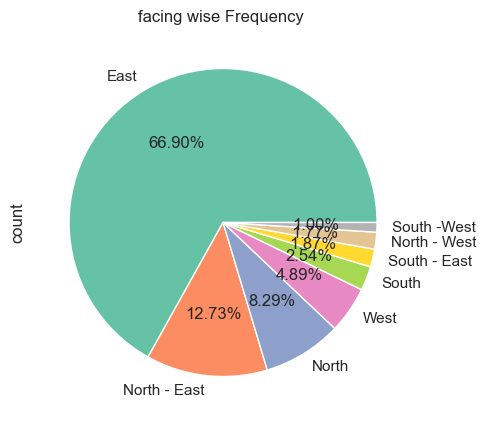

In [568]:
plt.figure(figsize = (10,3))
house_price_df["facing"].value_counts().plot(kind = "bar")
plt.xlabel("facing")
plt.ylabel("Frequency")
plt.title("facing wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["facing"].value_counts().plot.pie(autopct = "%.2f%%")
plt.title("facing wise Frequency ")
plt.show()

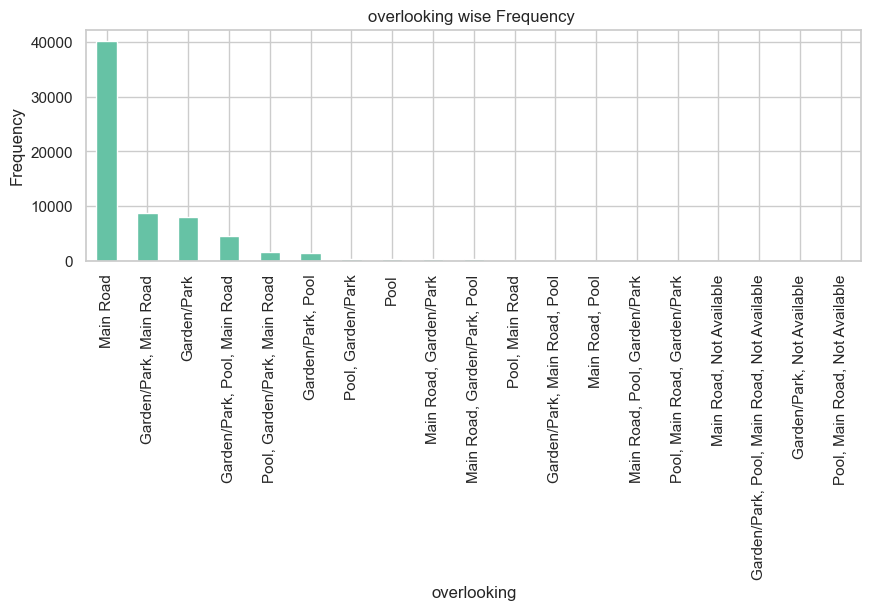

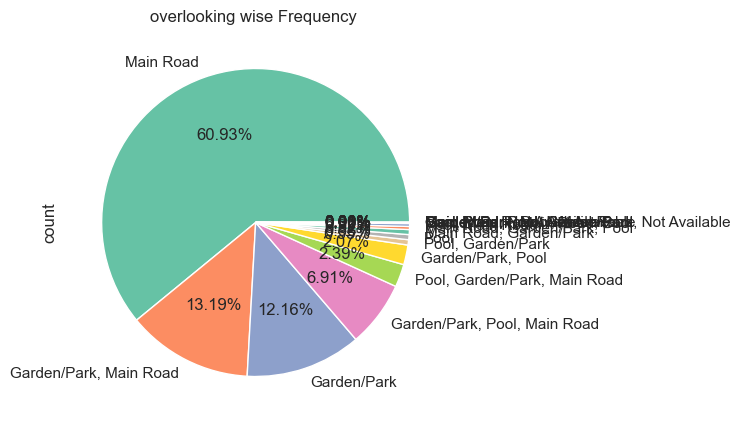

In [571]:
plt.figure(figsize = (10,3))
house_price_df["overlooking"].value_counts().plot(kind = "bar")
plt.xlabel("overlooking")
plt.ylabel("Frequency")
plt.title("overlooking wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["overlooking"].value_counts().plot.pie(autopct = "%.2f%%")
plt.title("overlooking wise Frequency ")
plt.show()

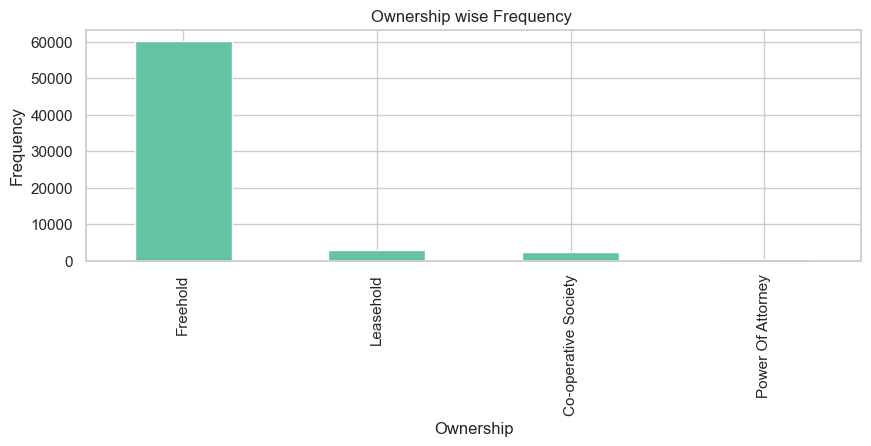

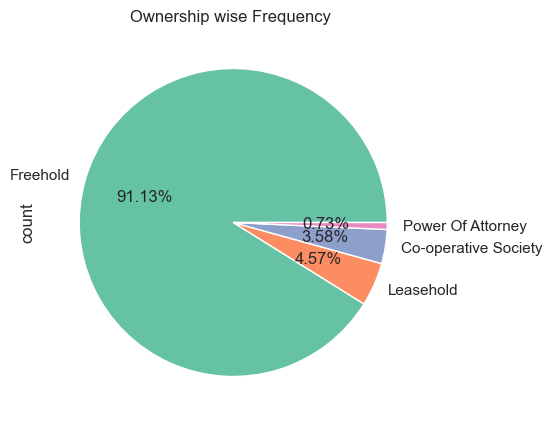

In [572]:
plt.figure(figsize = (10,3))
house_price_df["Ownership"].value_counts().plot(kind = "bar")
plt.xlabel("Ownership")
plt.ylabel("Frequency")
plt.title("Ownership wise Frequency ")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure(figsize = (10,5))
house_price_df["Ownership"].value_counts().plot.pie(autopct = "%.2f%%")
plt.title("Ownership wise Frequency ")
plt.show()

### Uni_variate NUmerical

In [576]:
house_price_df.head(2)

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22


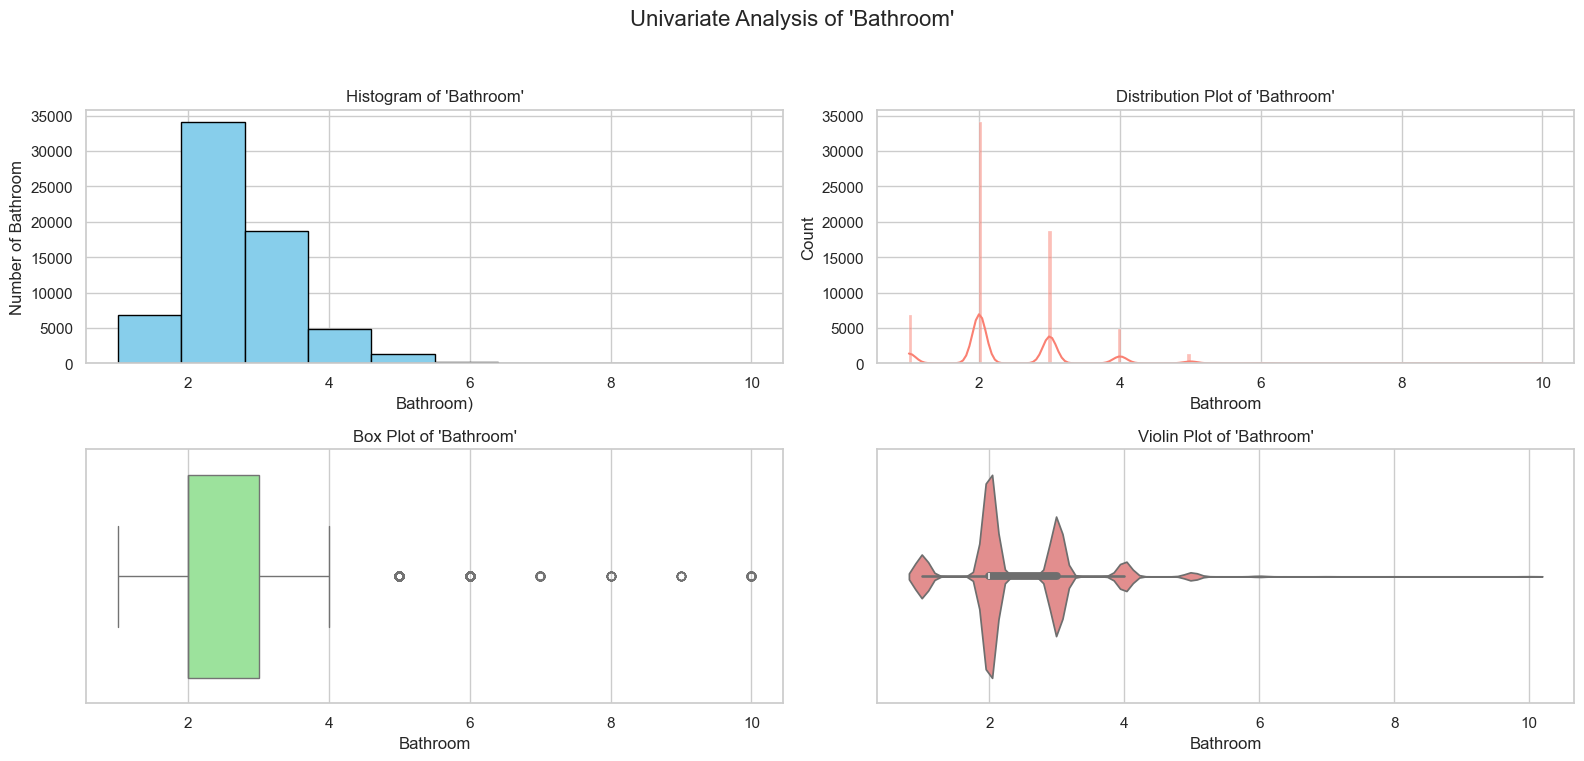

In [577]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.suptitle("Univariate Analysis of 'Bathroom'", fontsize=16)

# Histogram
axes[0, 0].hist( house_price_df["Bathroom"], edgecolor='black', color='skyblue')
axes[0, 0].set_title("Histogram of 'Bathroom'")
axes[0, 0].set_xlabel("Bathroom)")
axes[0, 0].set_ylabel("Number of Bathroom")
axes[0, 0].grid(True)

# Distribution Plot
sns.histplot( house_price_df["Bathroom"], kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title("Distribution Plot of 'Bathroom'")
axes[0, 1].grid(True)

# Box Plot
sns.boxplot(x=house_price_df["Bathroom"], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Box Plot of 'Bathroom'")

# Violin Plot
sns.violinplot(x=house_price_df["Bathroom"], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title("Violin Plot of 'Bathroom'")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Bi-variate

## Categorical vs Categorical

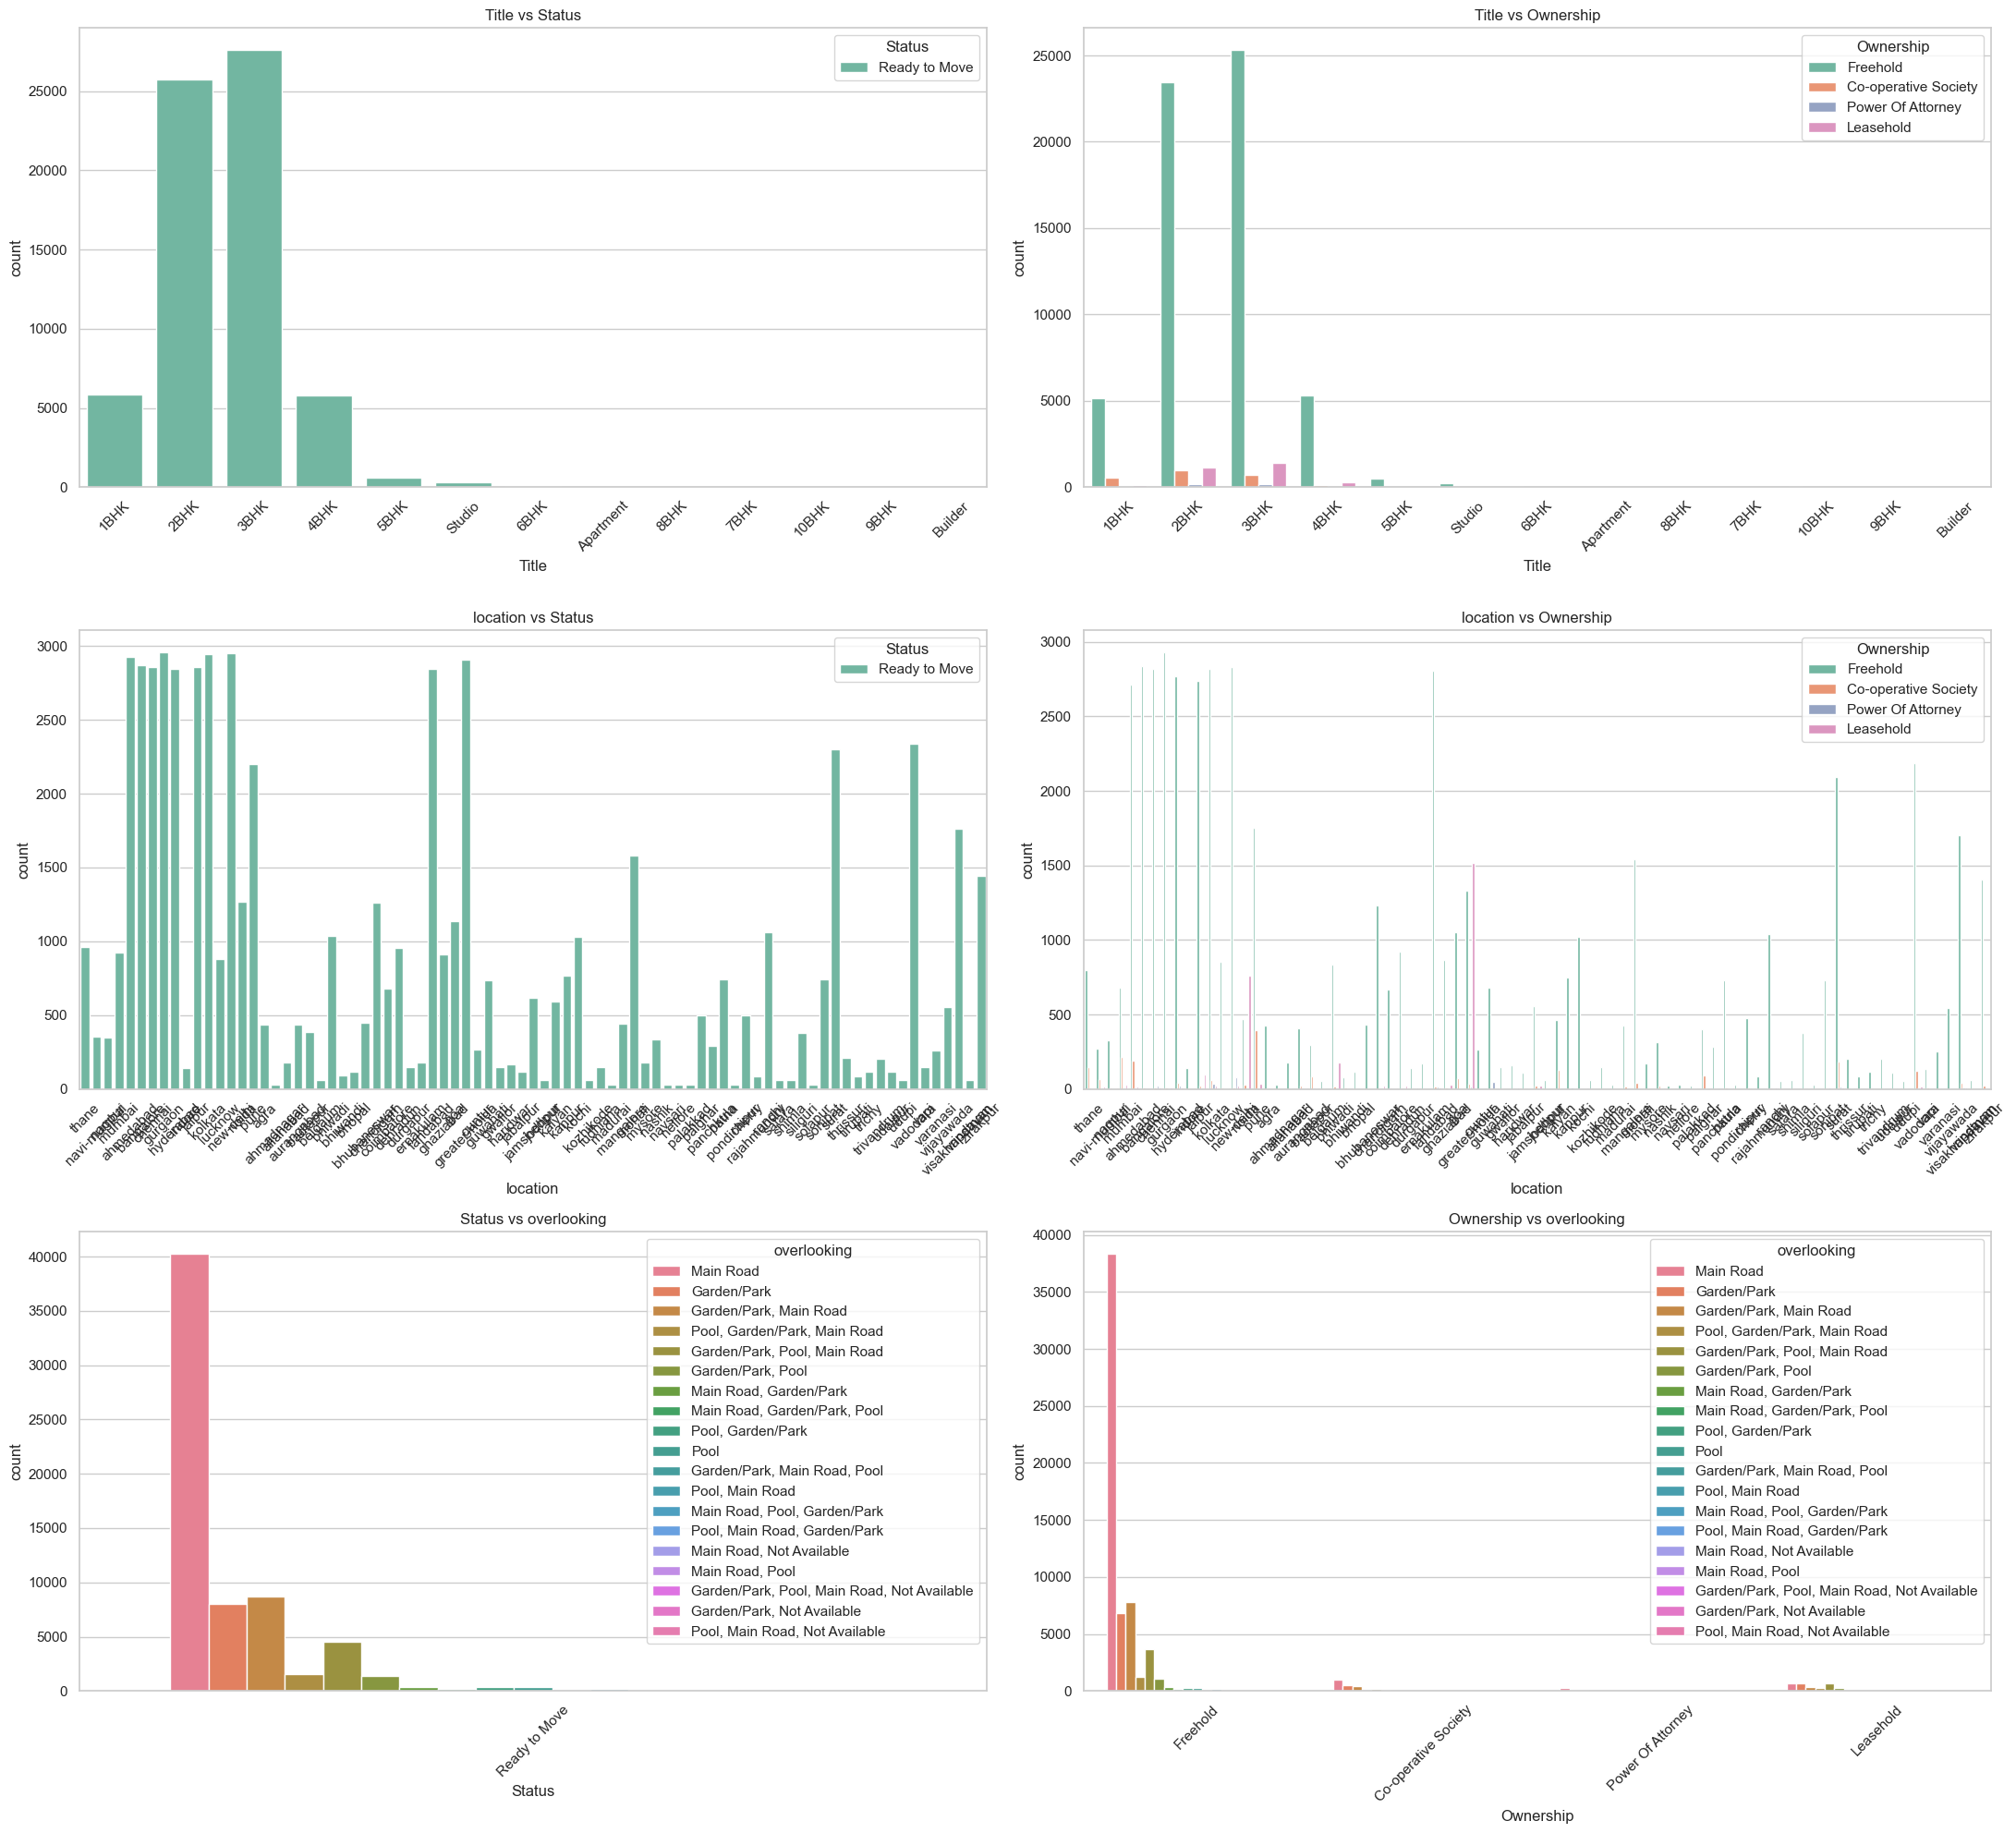

In [582]:
cat_pairs = [
    ('Title', 'Status'),
    ('Title', 'Ownership'),
    ('location', 'Status'),
    ('location', 'Ownership'),
    ('Status', 'overlooking'),
    ('Ownership', 'overlooking')
]

plt.figure(figsize=(22, 20))
for i, (x, hue) in enumerate(cat_pairs, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=house_price_df, x=x, hue=hue)
    plt.title(f'{x} vs {hue}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Categorical vs Categorical.png", dpi=300, bbox_inches='tight')
plt.show()


## Numerical vs Numerical

In [584]:
num_house_price_df = house_price_df.select_dtypes(include = "number")
house_price_df_correlation_data = num_house_price_df.corr()

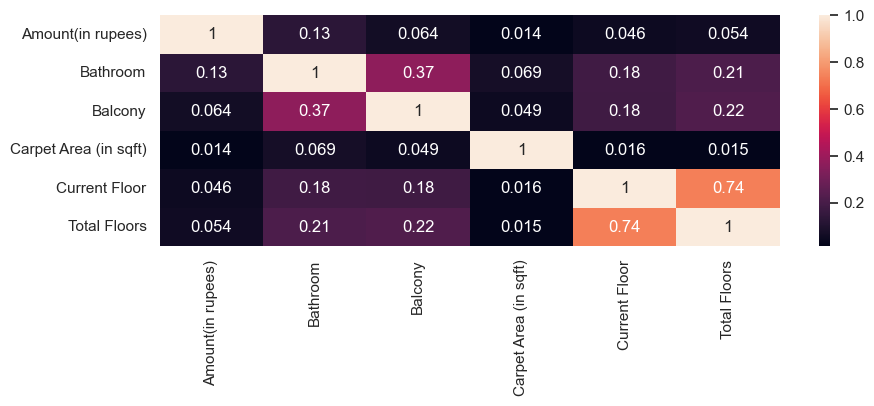

In [585]:
# Heat map
plt.figure(figsize = (10,3))
sns.heatmap(house_price_df_correlation_data,annot = True )
plt.show()

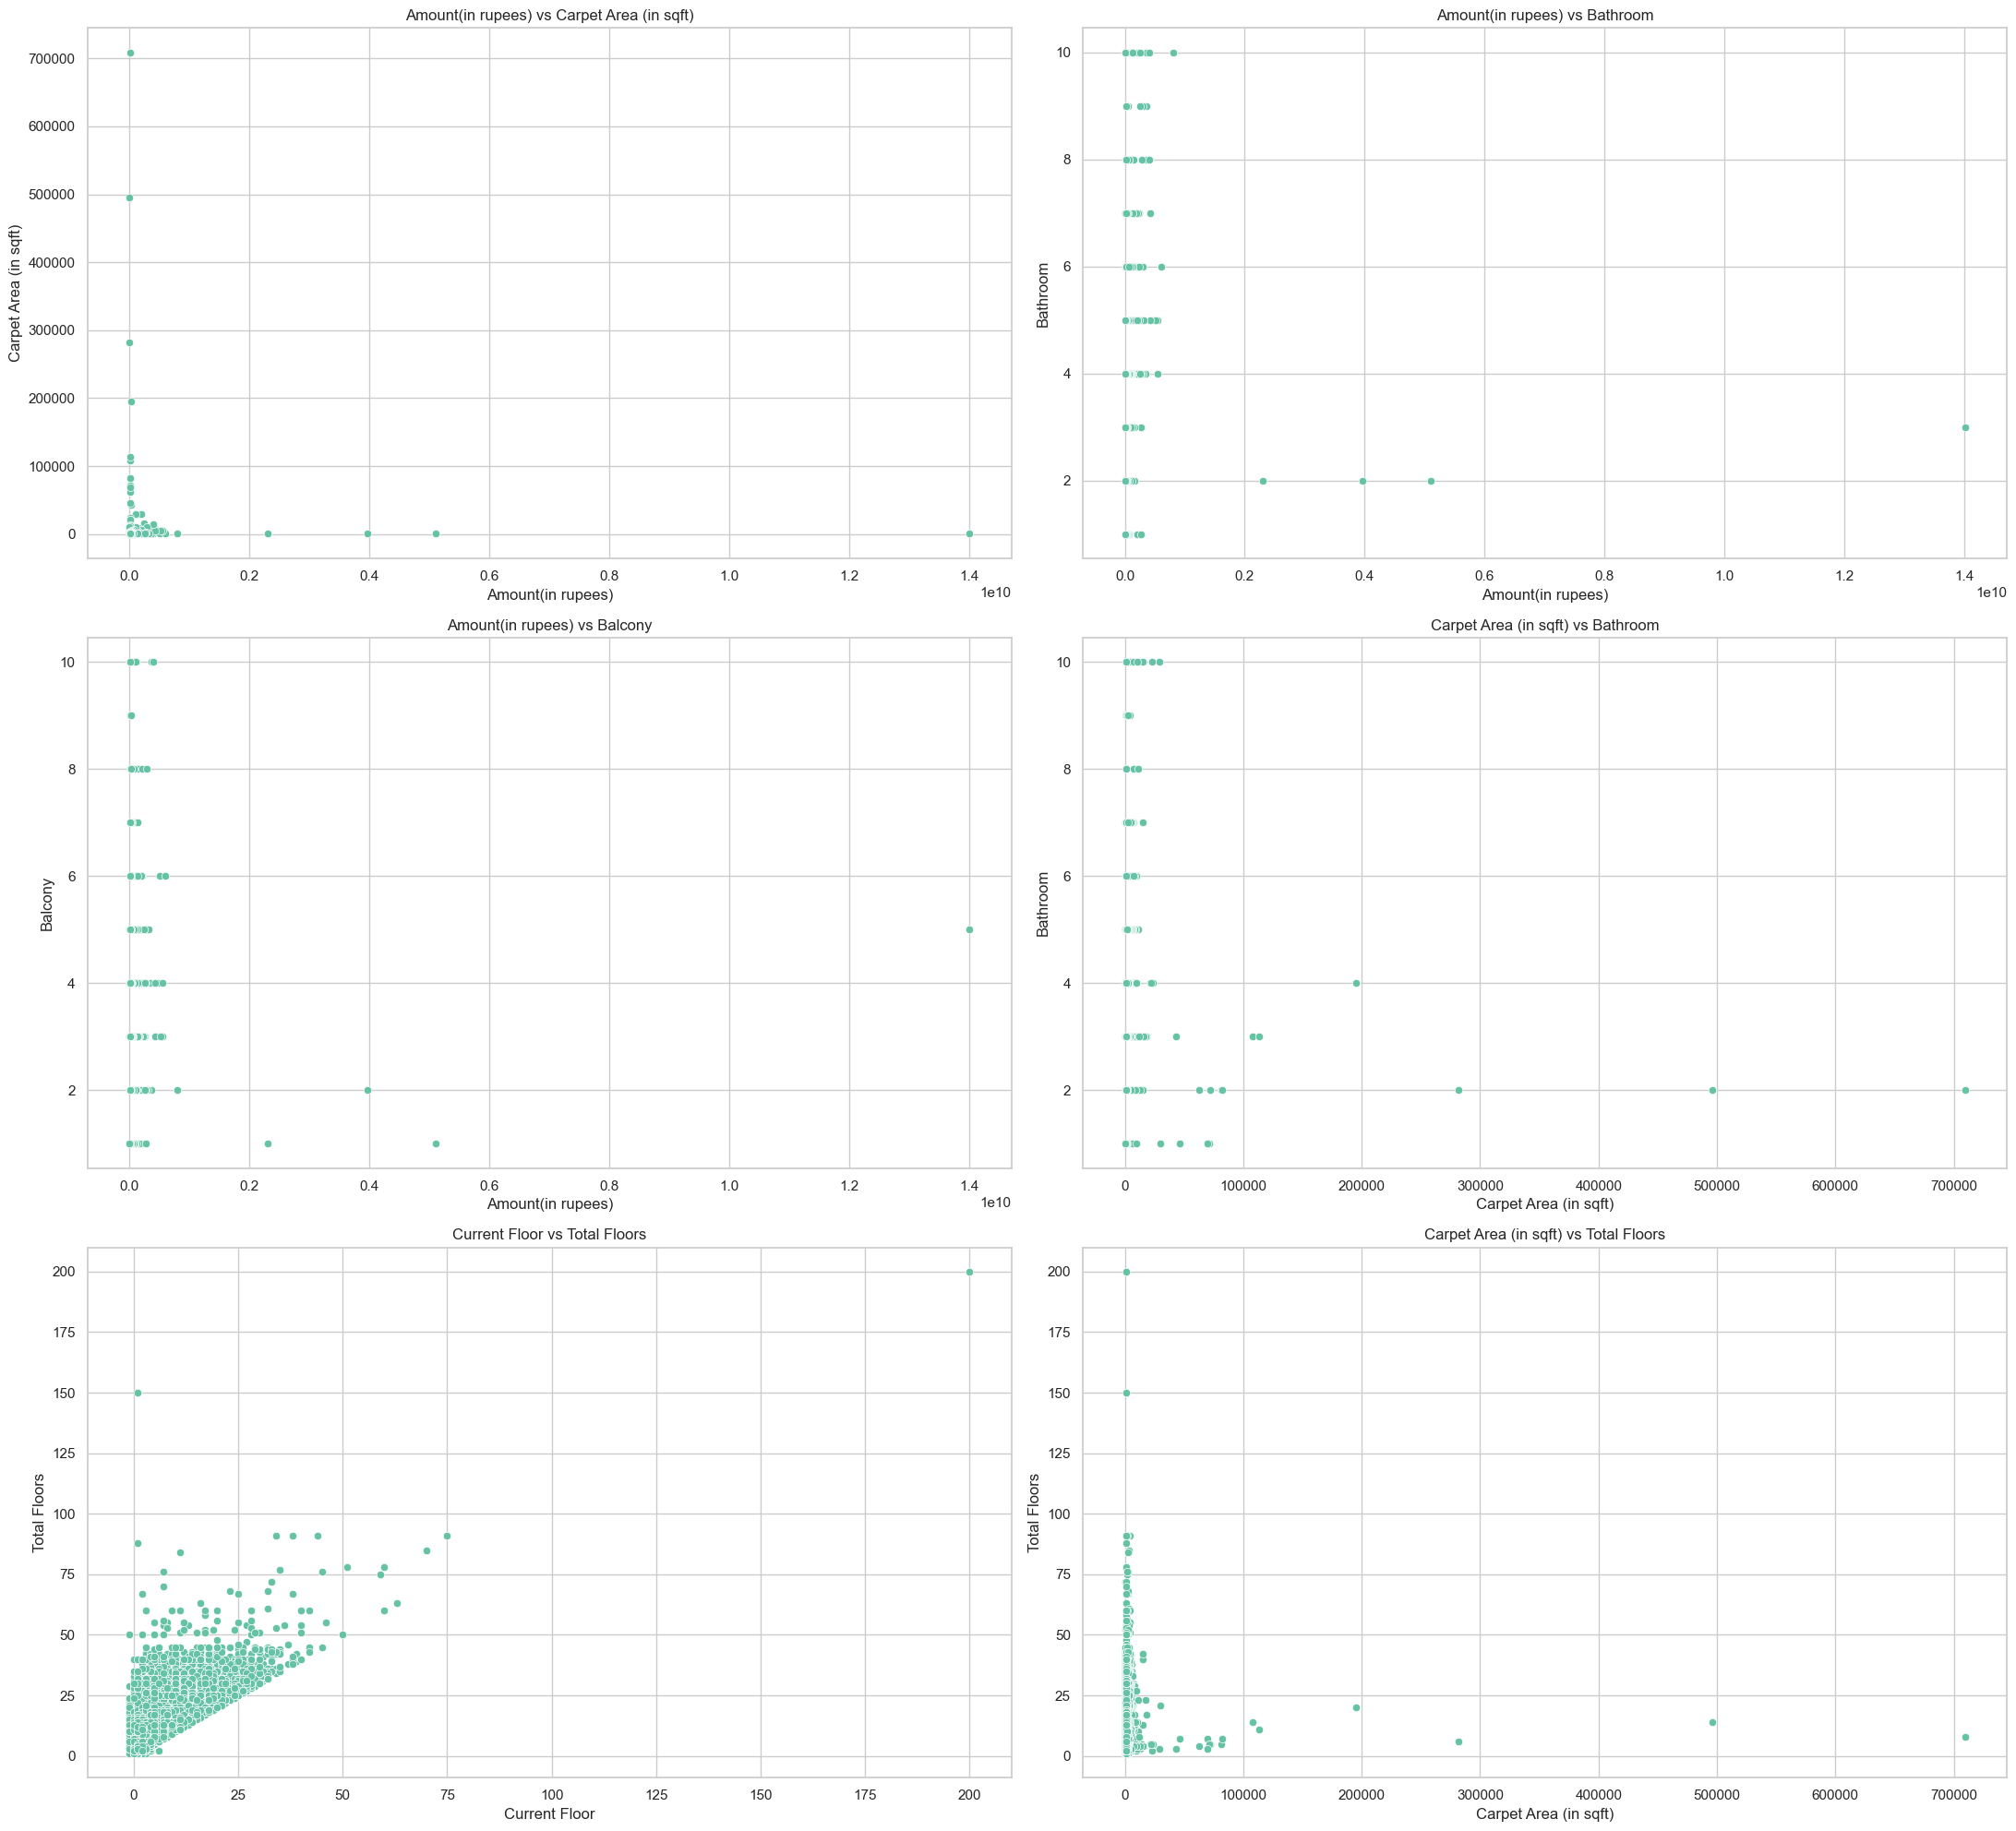

In [586]:
# Numerical vs Numerical
num_pairs = [
    ('Amount(in rupees)', 'Carpet Area (in sqft)'),
    ('Amount(in rupees)', 'Bathroom'),
    ('Amount(in rupees)', 'Balcony'),
    ('Carpet Area (in sqft)', 'Bathroom'),
    ('Current Floor', 'Total Floors'),
    ('Carpet Area (in sqft)', 'Total Floors')
]

plt.figure(figsize=(22, 20))
for i, (x, y) in enumerate(num_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=house_price_df, x=x, y=y)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()


## Categorical vs Numerical

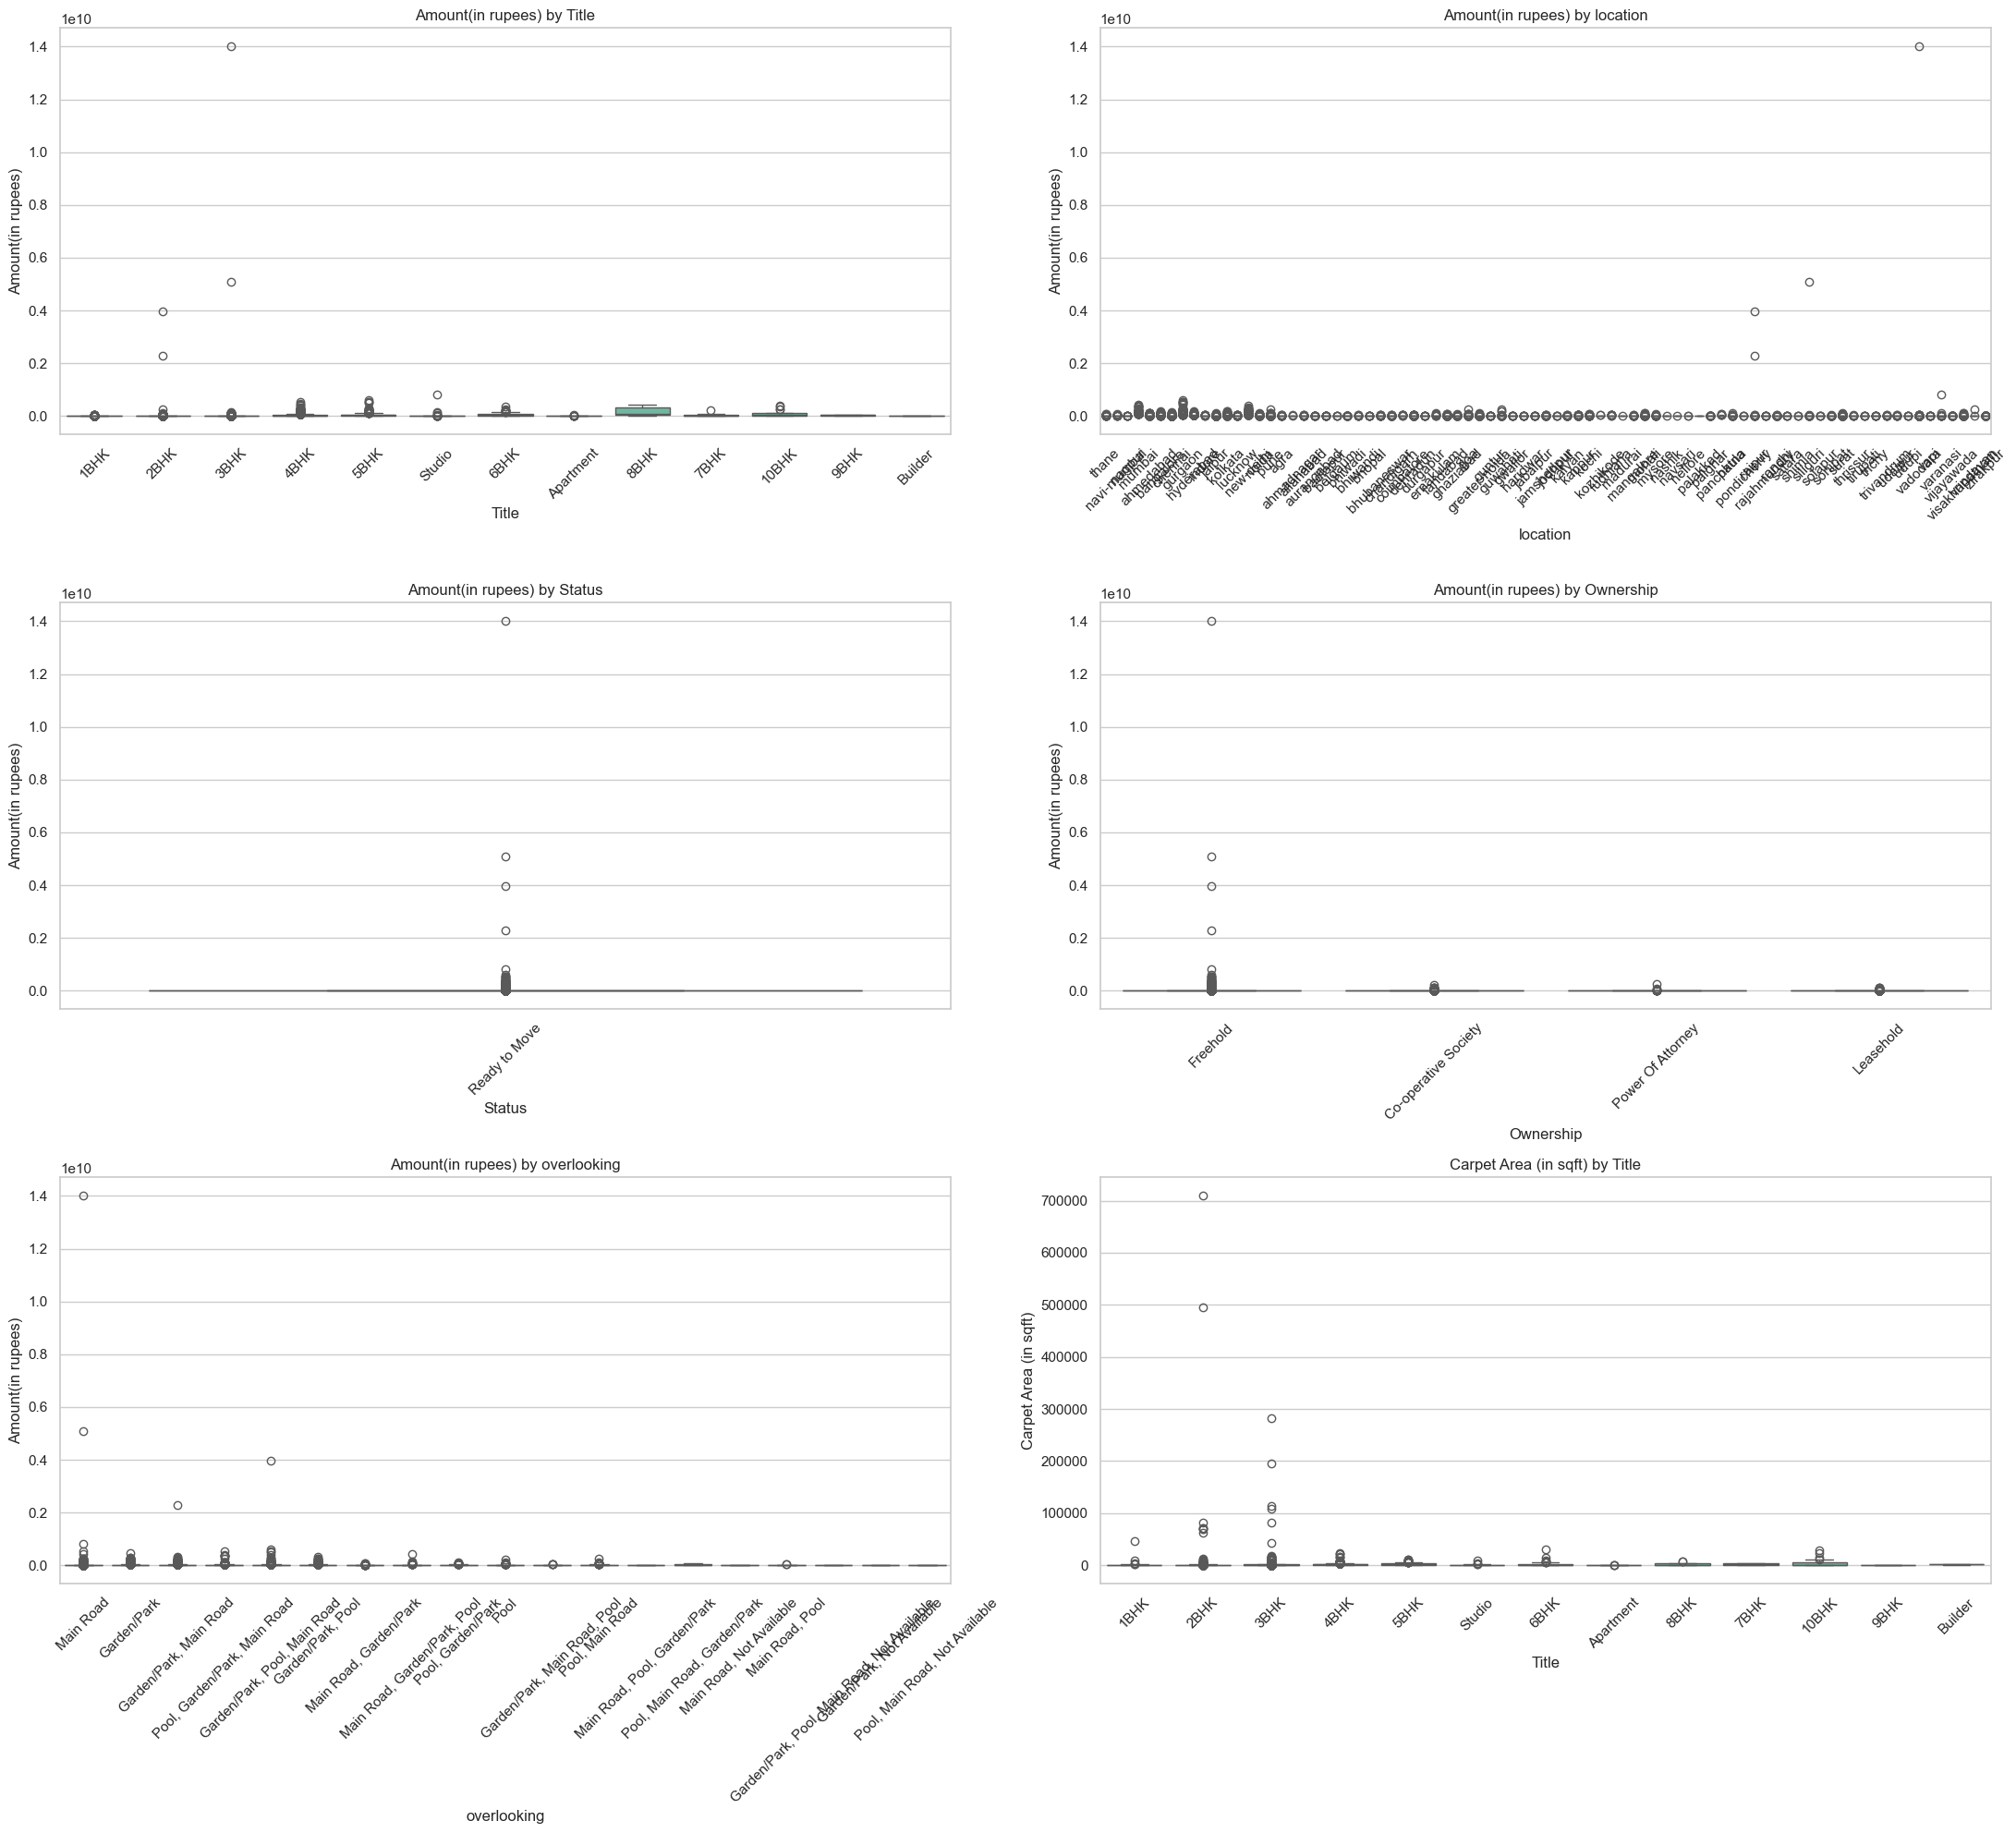

In [588]:
# Categorical vs Numerical
cat_num_pairs = [
    ('Title', 'Amount(in rupees)'),
    ('location', 'Amount(in rupees)'),
    ('Status', 'Amount(in rupees)'),
    ('Ownership', 'Amount(in rupees)'),
    ('overlooking', 'Amount(in rupees)'),
    ('Title', 'Carpet Area (in sqft)')
]

plt.figure(figsize=(22, 20))
for i, (cat, num) in enumerate(cat_num_pairs, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=house_price_df, x=cat, y=num)
    plt.title(f'{num} by {cat}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Pre-processing

In [591]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66067 entries, 0 to 187530
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  66067 non-null  object 
 1   location               66067 non-null  object 
 2   Status                 66067 non-null  object 
 3   Transaction            66067 non-null  object 
 4   Furnishing             66067 non-null  object 
 5   facing                 66067 non-null  object 
 6   overlooking            66067 non-null  object 
 7   Ownership              66067 non-null  object 
 8   Amount(in rupees)      66067 non-null  float64
 9   Bathroom               66067 non-null  int32  
 10  Balcony                66067 non-null  int32  
 11  Carpet Area (in sqft)  66067 non-null  float64
 12  Current Floor          66067 non-null  int32  
 13  Total Floors           66067 non-null  int32  
dtypes: float64(2), int32(4), object(8)
memory usage: 6.6+ MB


In [592]:
house_price_df.describe()

,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
count,6.606700e+04,66067.000000,66067.000000,66067.000000,66067.000000,66067.000000
mean,1.072529e+07,2.405316,2.058320,1294.527622,4.320750,8.572767
std,6.250890e+07,0.894543,0.867377,3789.761434,4.373207,6.866177
min,1.000000e+05,1.000000,1.000000,1.000000,-1.000000,1.000000
25%,4.200000e+06,2.000000,2.000000,1035.000000,2.000000,4.000000
50%,6.600000e+06,2.000000,2.000000,1294.400000,3.000000,6.000000
75%,1.071553e+07,3.000000,2.000000,1294.400000,5.000000,12.000000
max,1.400300e+10,10.000000,10.000000,709222.000000,200.000000,200.000000


In [593]:
house_price_df.head()

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22
2,2BHK,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29
3,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,2500000.0,1,1,530.0,1,3
4,2BHK,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42


In [594]:
house_price_df.columns

Index(['Title', 'location', 'Status', 'Transaction', 'Furnishing', 'facing',
       'overlooking', 'Ownership', 'Amount(in rupees)', 'Bathroom', 'Balcony',
       'Carpet Area (in sqft)', 'Current Floor', 'Total Floors'],
      dtype='object')

In [595]:
house_price_df.head()

,Title,location,Status,Transaction,Furnishing,facing,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors
0,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,4200000.0,1,2,500.0,10,11
1,2BHK,thane,Ready to Move,Resale,Semi-Furnished,East,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22
2,2BHK,thane,Ready to Move,Resale,Unfurnished,East,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29
3,1BHK,thane,Ready to Move,Resale,Unfurnished,East,Main Road,Freehold,2500000.0,1,1,530.0,1,3
4,2BHK,thane,Ready to Move,Resale,Unfurnished,West,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42


## Data Encoding

In [597]:
# Custom mappings
facing_map = {
    'East': 8,
    'North - East': 7,
    'North': 6,
    'West': 5,
    'South': 4,
    'North - West': 3,
    'South - East': 2,
    'South -West': 1
}

furnishing_map = {
    'Furnished': 3,
    'Semi-Furnished': 2,
    'Unfurnished': 1
}

transaction_map = {
    'New Property': 3,
    'Resale': 2,
    'Other': 1,
    'Rent/Lease':0
}

# Apply the mappings
house_price_df['facing_encoded'] = house_price_df['facing'].map(facing_map)
house_price_df['Furnishing_encoded'] = house_price_df['Furnishing'].map(furnishing_map)
house_price_df['Transaction_encoded'] = house_price_df['Transaction'].map(transaction_map)

print(house_price_df[['facing', 'facing_encoded', 'Furnishing', 'Furnishing_encoded', 'Transaction', 'Transaction_encoded']].head())
house_price_df.drop(["facing","Furnishing","Transaction"],axis = 1,inplace = True)

  facing  facing_encoded      Furnishing  Furnishing_encoded Transaction  \
0   East               8     Unfurnished                   1      Resale   
1   East               8  Semi-Furnished                   2      Resale   
2   East               8     Unfurnished                   1      Resale   
3   East               8     Unfurnished                   1      Resale   
4   West               5     Unfurnished                   1      Resale   

   Transaction_encoded  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  


In [598]:
house_price_df["facing_encoded"].isna().sum()


0

In [599]:
house_price_df.head()

,Title,location,Status,overlooking,Ownership,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors,facing_encoded,Furnishing_encoded,Transaction_encoded
0,1BHK,thane,Ready to Move,Main Road,Freehold,4200000.0,1,2,500.0,10,11,8,1,2
1,2BHK,thane,Ready to Move,Garden/Park,Freehold,9800000.0,2,2,473.0,3,22,8,2,2
2,2BHK,thane,Ready to Move,Garden/Park,Freehold,14000000.0,2,2,779.0,10,29,8,1,2
3,1BHK,thane,Ready to Move,Main Road,Freehold,2500000.0,1,1,530.0,1,3,8,1,2
4,2BHK,thane,Ready to Move,"Garden/Park, Main Road",Co-operative Society,16000000.0,2,2,635.0,20,42,5,1,2


In [600]:
house_price_df["Transaction_encoded"].unique()

array([2, 3, 1, 0], dtype=int64)

In [601]:
x_cat_cols = house_price_df.select_dtypes(include = "object")
x_num_cols =  house_price_df.select_dtypes(include = "number")

In [602]:
x_cat_cols.shape

(66067, 5)

In [603]:
x_num_cols.shape

(66067, 9)

In [604]:
x_cat_cols.head()

,Title,location,Status,overlooking,Ownership
0,1BHK,thane,Ready to Move,Main Road,Freehold
1,2BHK,thane,Ready to Move,Garden/Park,Freehold
2,2BHK,thane,Ready to Move,Garden/Park,Freehold
3,1BHK,thane,Ready to Move,Main Road,Freehold
4,2BHK,thane,Ready to Move,"Garden/Park, Main Road",Co-operative Society


## One-hot Encoding

In [606]:
x_cat_cols = pd.get_dummies(x_cat_cols,dtype=int)
x_cat_cols.head()

,Title_10BHK,Title_1BHK,Title_2BHK,Title_3BHK,Title_4BHK,Title_5BHK,Title_6BHK,Title_7BHK,Title_8BHK,Title_9BHK,...,overlooking_Pool,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park","overlooking_Pool, Main Road, Not Available",Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [607]:
x_cat_cols.shape

(66067, 118)

In [608]:
x_num_cols.head()

,Amount(in rupees),Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors,facing_encoded,Furnishing_encoded,Transaction_encoded
0,4200000.0,1,2,500.0,10,11,8,1,2
1,9800000.0,2,2,473.0,3,22,8,2,2
2,14000000.0,2,2,779.0,10,29,8,1,2
3,2500000.0,1,1,530.0,1,3,8,1,2
4,16000000.0,2,2,635.0,20,42,5,1,2


In [609]:
x = pd.concat([x_cat_cols,x_num_cols],axis=1)

In [610]:
x.shape 

(66067, 127)

In [611]:
x["Amount(in rupees)"].isnull().sum()


0

## Train-Test Split

In [613]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)


In [614]:
x = x_scaled_df.drop('Amount(in rupees)',axis = 1)
y = (x_scaled_df['Amount(in rupees)'])

In [615]:
from sklearn.model_selection import train_test_split #sci-kit learn
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [616]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 8)

In [617]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(52853, 126) (13214, 126) (52853,) (13214,)


In [618]:
x_test.head()

,Title_10BHK,Title_1BHK,Title_2BHK,Title_3BHK,Title_4BHK,Title_5BHK,Title_6BHK,Title_7BHK,Title_8BHK,Title_9BHK,...,Ownership_Leasehold,Ownership_Power Of Attorney,Bathroom,Balcony,Carpet Area (in sqft),Current Floor,Total Floors,facing_encoded,Furnishing_encoded,Transaction_encoded
132,-0.024919,3.204444,-0.799460,-0.847316,-0.309460,-0.093536,-0.036728,-0.015564,-0.013478,-0.010294,...,-0.218786,-0.085459,-1.571000,-0.067237,-0.000034,-0.530679,-0.229062,0.541243,1.866394,-0.574071
29212,-0.024919,3.204444,-0.799460,-0.847316,-0.309460,-0.093536,-0.036728,-0.015564,-0.013478,-0.010294,...,-0.218786,-0.085459,-1.571000,-0.067237,-0.222846,-0.073345,-0.665989,0.541243,-1.037887,-0.574071
30373,-0.024919,-0.312067,-0.799460,-0.847316,3.231432,-0.093536,-0.036728,-0.015564,-0.013478,-0.010294,...,-0.218786,-0.085459,1.782694,-0.067237,-0.000034,0.155322,0.353508,0.541243,0.414254,-0.574071
52184,-0.024919,-0.312067,1.250845,-0.847316,-0.309460,-0.093536,-0.036728,-0.015564,-0.013478,-0.010294,...,-0.218786,-0.085459,-0.453102,-0.067237,-0.000034,-0.530679,-0.665989,0.541243,-1.037887,-0.574071
51318,-0.024919,-0.312067,-0.799460,1.180197,-0.309460,-0.093536,-0.036728,-0.015564,-0.013478,-0.010294,...,-0.218786,-0.085459,0.664796,-0.067237,-0.000034,-0.759346,-0.665989,0.541243,0.414254,-0.574071


## Model Training¶

In [620]:
model = LinearRegression() # model initilization

In [621]:
model.fit(x_train,y_train)

LinearRegression()

## Model Testing

In [623]:
test_predictions=model.predict(x_test)

In [624]:
test_predictions

array([-0.115641  , -0.1170471 ,  0.18718531, ..., -0.17745579,
        0.16656917,  0.18215847])

In [625]:
y_test

132     -0.051598
29212   -0.151584
30373   -0.067596
52184   -0.120388
51318   -0.073995
           ...   
17872    0.244362
33794   -0.107750
31994   -0.107590
55411   -0.128867
59877    0.020393
Name: Amount(in rupees), Length: 13214, dtype: float64

In [626]:
train_predictions=model.predict(x_train)

In [627]:
print("Test Mean Squared Error: ",mean_squared_error(y_test,test_predictions))

Test Mean Squared Error:  0.3435196344216327


In [628]:
print("Train Mean Squared Error: ",mean_squared_error(y_train,train_predictions))

Train Mean Squared Error:  1.1319512290360039


In [629]:
print("Test R2 Score: ",1-r2_score(y_test,test_predictions))

Test R2 Score:  0.9342430540049531


## Ridge Model

In [632]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=1)

In [633]:
rigde_test=ridge_model.predict(x_test)
rigde_train=ridge_model.predict(x_train)

In [634]:
print("Ridge Model MSE of Train: ",mean_squared_error(y_train,rigde_train))

Ridge Model MSE of Train:  1.1319104292475064


In [635]:
print("Ridge Model MSE of Test: ",mean_squared_error(y_test,rigde_test))

Ridge Model MSE of Test:  0.3435503883425746


In [636]:
print("Ridge Model Train R^2 value: ",1-r2_score(y_train,rigde_train))

Ridge Model Train R^2 value:  0.9773989284080034


In [637]:
print("Ridge Model Test R^2 value: ",1-r2_score(y_test,rigde_test))

Ridge Model Test R^2 value:  0.9343266930000625


In [630]:
print("Train R2 Score: ",1-r2_score(y_train,train_predictions))

Train R2 Score:  0.9774341588189319


## Lasso Model

In [639]:
Lasso_model=Lasso(alpha=0.001)
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.001)

In [640]:
Lasso_test=Lasso_model.predict(x_test)
Lasso_train=Lasso_model.predict(x_train)

In [641]:
print("Lasso Model MSE of Train: ",mean_squared_error(y_train,Lasso_train))

Lasso Model MSE of Train:  1.1320028284378942


In [642]:
print("Lasso Model MSE of Test: ",mean_squared_error(y_test,Lasso_test))

Lasso Model MSE of Test:  0.34354341227876645


In [643]:
print("Lasso Model Train R^2 value: ",1-r2_score(y_train,Lasso_train))

Lasso Model Train R^2 value:  0.9774787146413814


In [644]:
print("Lasso Model Test R^2 value: ",1-r2_score(y_test,Lasso_test))

Lasso Model Test R^2 value:  0.9343077207536347


In [469]:
plt.savefig("Univariate_Categorical_Plots.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

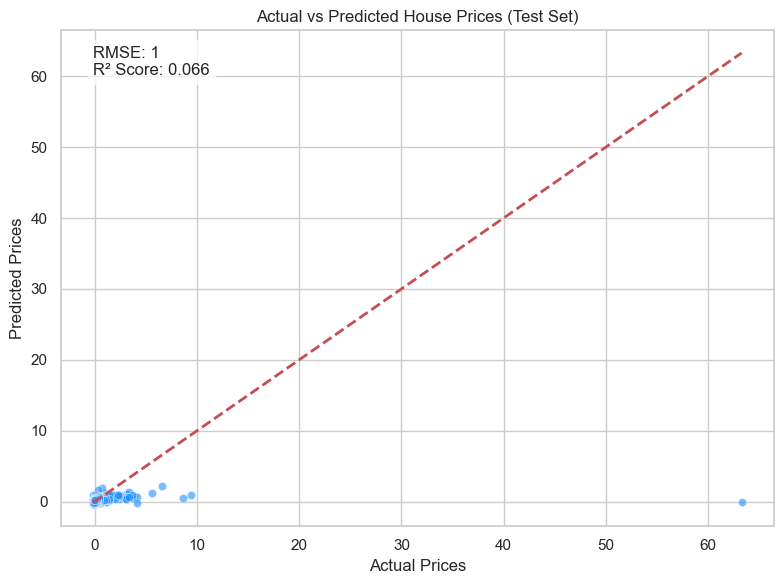

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute metrics using test_predictions
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=test_predictions, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Test Set)")
plt.grid(True)

# Annotate RMSE and R²
plt.text(x=y_test.min(), y=y_test.max()*0.95, 
         s=f"RMSE: {rmse:,.0f}\nR² Score: {r2:.3f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Save the plot
plt.tight_layout()
plt.savefig("HousePrice_Actual_vs_Test_Predicted.png", dpi=300, bbox_inches='tight')
plt.show()
